# Naive Bayes

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

## Mass Shooting

In [3]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_mass_shooting_all_years.csv")
df

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3106715,"December 31, 2024",California,Oakland,200 block of Second St,1,3,0,0,0,NaN
1,3107076,"December 31, 2024",Mississippi,Natchez,Finger Ln and Lower Woodville Rd,1,5,0,0,1,NaN
2,3105091,"December 30, 2024",New York,Bronx,3544 White Plains Rd,0,6,0,0,0,NaN
3,3105154,"December 30, 2024",New York,Rochester,100 block of Hollenbeck St,0,4,0,0,0,NaN
4,3103855,"December 28, 2024",West Virginia,Grantsville,5957 Pine Creek Rd,2,2,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5178,95500,"January 12, 2014",Louisiana,Delhi,3600 block of US-80 W,0,6,0,0,8,NaN
5179,95146,"January 11, 2014",Mississippi,Jackson,3430 W. Capitol Street,0,4,0,0,0,NaN
5180,94514,"January 5, 2014",Pennsylvania,Erie,829 Parade St,1,3,0,0,0,NaN
5181,92704,"January 3, 2014",New York,Queens,Farmers Boulevard and 133rd Avenue,1,3,0,0,0,NaN


In [4]:
# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3106715,"December 31, 2024",California,Oakland,200 block of Second St,1,3,0,0,0,0.0,1
1,3107076,"December 31, 2024",Mississippi,Natchez,Finger Ln and Lower Woodville Rd,1,5,0,0,1,0.0,1
2,3105091,"December 30, 2024",New York,Bronx,3544 White Plains Rd,0,6,0,0,0,0.0,0
3,3105154,"December 30, 2024",New York,Rochester,100 block of Hollenbeck St,0,4,0,0,0,0.0,0
4,3103855,"December 28, 2024",West Virginia,Grantsville,5957 Pine Creek Rd,2,2,0,0,1,0.0,1


In [5]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [6]:
# number of instances with 1 target variable for training set
display(y_train.value_counts())

# number of instances with 1 target variable for test set
display(y_test.value_counts())

Target
1    1911
0    1717
Name: count, dtype: int64

Target
1    850
0    705
Name: count, dtype: int64

In [12]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head(10))
display(pd.DataFrame(y_train).head(10))

# combine X_train and y_train for better visualization
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=["Target"])], axis=1)
display(train_df.head(10))
os.makedirs('../../recourses/img/tables', exist_ok=True)
plt.savefig('../../recourses/img/tables', bbox_inches='tight', dpi=300)

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
620,3,0,0,4
621,8,0,0,0
3144,2,0,0,1
2770,4,0,0,0
2201,3,0,0,0
5136,3,0,0,0
4001,3,0,0,0
1563,5,0,0,0
4654,5,0,0,0
3564,3,0,0,4


,Target
620,1
621,0
3144,1
2770,0
2201,1
5136,1
4001,1
1563,0
4654,0
3564,1


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Target
620,3,0,0,4,1
621,8,0,0,0,0
3144,2,0,0,1,1
2770,4,0,0,0,0
2201,3,0,0,0,1
5136,3,0,0,0,1
4001,3,0,0,0,1
1563,5,0,0,0,0
4654,5,0,0,0,0
3564,3,0,0,4,1


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4754,9,0,0,0
5161,5,0,0,0
2027,4,0,0,0
405,4,0,0,0
2470,4,0,0,5


,Target
4754,0
5161,0
2027,0
405,0
2470,0


<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [18]:
# implementing naive bayes classifier
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB() # used to fit the model and make later predictions
classifier.fit(X_train, y_train) # X_train is the feature matrix, y_train is a binary response

preds = classifier.predict(sc.transform(X_test))
preds

array([1, 0, 0, ..., 0, 0, 1], shape=(1555,))

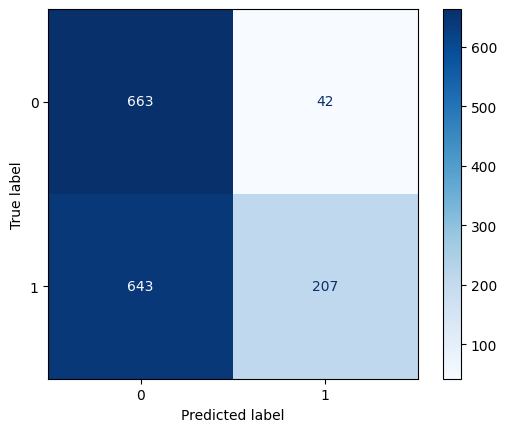

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
disp.plot(cmap = plt.cm.Blues)
disp

In [20]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

Accuracy:  0.5594855305466238
F1 Score:  0.37670609645131936
Recall Score:  0.24352941176470588


## School Shooting

In [21]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_school_shooting.csv")
df

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3102636,"December 26, 2024",Washington,Pullman,800 block of NE California St,NaN,1,0,0,0,1,NaN
1,3099438,"December 20, 2024",South Carolina,Blythewood,180 Turkey Farm Rd,Westwood High School,0,0,0,0,1,NaN
2,3138348,"December 20, 2024",Massachusetts,Lynn,235 O'Callaghan Way,Classical High School,0,0,0,0,1,NaN
3,3098581,"December 19, 2024",Illinois,Oreana,400 W South St,Argenta-Oreana Elementary School,0,0,0,0,1,NaN
4,3098506,"December 19, 2024",Arkansas,Paragould,US-412 and Co Rd 808,NaN,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8253,95740,"January 13, 2014",Virginia,Richmond,6900 Wilkinson Rd,Wilder Middle School,0,0,0,0,0,NaN
8254,95980,"January 13, 2014",New Jersey,Jersey City,339 Stegman Pkwy,James F Murray Elem School 38,0,0,0,0,0,NaN
8255,96155,"January 13, 2014",Virginia,Henrico,6900 Wilkinson Rd,Wilder Middle School,0,0,0,0,1,NaN
8256,94888,"January 9, 2014",Maryland,Baltimore,5025 Dickey Hill Rd,Dickey Hill Elementary Middle School,0,1,0,0,0,NaN


In [22]:
# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3102636,"December 26, 2024",Washington,Pullman,800 block of NE California St,0,1,0,0,0,1,0.0,1
1,3099438,"December 20, 2024",South Carolina,Blythewood,180 Turkey Farm Rd,Westwood High School,0,0,0,0,1,0.0,0
2,3138348,"December 20, 2024",Massachusetts,Lynn,235 O'Callaghan Way,Classical High School,0,0,0,0,1,0.0,0
3,3098581,"December 19, 2024",Illinois,Oreana,400 W South St,Argenta-Oreana Elementary School,0,0,0,0,1,0.0,0
4,3098506,"December 19, 2024",Arkansas,Paragould,US-412 and Co Rd 808,0,0,0,1,0,0,0.0,0


In [23]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [24]:
# number of instances with 1 target variable for training set
display(y_train.value_counts())

# number of instances with 1 target variable for test set
display(y_test.value_counts())

Target
0    5591
1     189
Name: count, dtype: int64

Target
0    2391
1      87
Name: count, dtype: int64

In [25]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
4874,0,0,0,0
4661,0,0,0,0
5824,0,0,0,0
5492,0,0,0,1
3501,1,0,0,1


,Target
4874,0
4661,0
5824,0
5492,0
3501,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
3490,0,0,0,1
1831,0,0,0,1
635,0,0,0,1
7821,2,0,0,1
5135,0,0,0,1


,Target
3490,0
1831,0
635,0
7821,0
5135,0


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [27]:
# implementing naive bayes classifier
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB() # used to fit the model and make later predictions
classifier.fit(X_train, y_train) # X_train is the feature matrix, y_train is a binary response

preds = classifier.predict(sc.transform(X_test))
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(2478,))

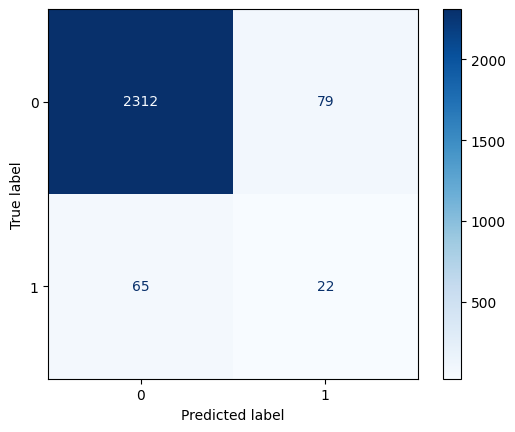

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
disp.plot(cmap = plt.cm.Blues)
disp

In [29]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

Accuracy:  0.9418886198547215
F1 Score:  0.23404255319148937
Recall Score:  0.25287356321839083


## Officer Involved

In [30]:
# reading the dataset
df = pd.read_csv("gunviolencearchive_officer_involved_shooting.csv")
df

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3104306,"December 29, 2024",Tennessee,Philadelphia,2300 block of Reed Springs Rd,0,1,0,0,1,NaN
1,3102679,"December 26, 2024",Indiana,Marion,3000 block of County Rd 450 N,0,1,0,1,1,NaN
2,3098753,"December 20, 2024",Louisiana,Ville Platte,N Chataignier St,0,3,0,0,0,NaN
3,3099323,"December 20, 2024",Oklahoma,Oklahoma City,6600 block of Bayberry Dr,1,2,1,0,0,NaN
4,3099063,"December 20, 2024",Ohio,Dayton (Trotwood),Shiloh Springs Rd and Olive Rd,0,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2913,93918,"January 7, 2014",Virginia,Ferrum,4411 Prillaman Switch Rd,0,1,0,1,2,NaN
2914,93045,"January 4, 2014",Georgia,Lawrenceville,3000 block of Smokemist Trace,0,1,1,0,0,NaN
2915,103005,"January 3, 2014",Oklahoma,Oklahoma City,W Hefner Rd and N Western Ave,0,1,1,0,0,NaN
2916,92962,"January 3, 2014",Arizona,Phoenix,NaN,0,1,0,0,0,NaN


In [31]:
# cleaning up a little bit
df = df.fillna(0)
df['Target'] = (df['Victims Killed'] > 0).astype(int)
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Target
0,3104306,"December 29, 2024",Tennessee,Philadelphia,2300 block of Reed Springs Rd,0,1,0,0,1,0.0,0
1,3102679,"December 26, 2024",Indiana,Marion,3000 block of County Rd 450 N,0,1,0,1,1,0.0,0
2,3098753,"December 20, 2024",Louisiana,Ville Platte,N Chataignier St,0,3,0,0,0,0.0,0
3,3099323,"December 20, 2024",Oklahoma,Oklahoma City,6600 block of Bayberry Dr,1,2,1,0,0,0.0,1
4,3099063,"December 20, 2024",Ohio,Dayton (Trotwood),Shiloh Springs Rd and Olive Rd,0,1,1,0,0,0.0,0


In [32]:
features = ['Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [33]:
# number of instances with 1 target variable for training set
display(y_train.value_counts())

# number of instances with 1 target variable for test set
display(y_test.value_counts())

Target
0    1833
1     209
Name: count, dtype: int64

Target
0    780
1     96
Name: count, dtype: int64

In [34]:
# display the data after splitting

# training set
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(y_train).head())

# test set
display(pd.DataFrame(X_test).head())
display(pd.DataFrame(y_test).head())

,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
1,1,0,1,1
384,1,0,0,1
530,2,1,0,0
588,1,1,0,0
1032,2,0,0,0


,Target
1,0
384,0
530,0
588,0
1032,0


,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
380,1,1,0,0
2598,1,1,0,0
1774,1,0,0,0
841,1,1,0,0
22,1,0,0,1


,Target
380,0
2598,0
1774,0
841,0
22,0


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [36]:
# implementing naive bayes classifier
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB() # used to fit the model and make later predictions
classifier.fit(X_train, y_train) # X_train is the feature matrix, y_train is a binary response

preds = classifier.predict(sc.transform(X_test))
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

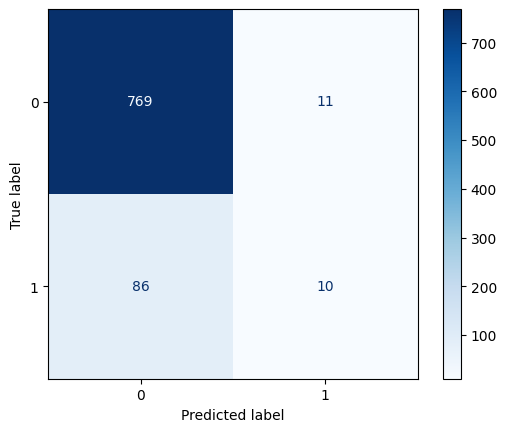

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= classifier.classes_)
disp.plot(cmap = plt.cm.Blues)
disp

In [38]:
# Accuracy, F1 score, and Recall score
accuracy = accuracy_score(y_test, preds) # measures the overall correctness of the model i.e. how many predictions were accurate
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall Score: ", recall)

Accuracy:  0.889269406392694
F1 Score:  0.17094017094017094
Recall Score:  0.10416666666666667
